In [1]:
#mixwed layer
#cal dzdt

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
#load in T datset. Test with GODAS

In [3]:
T = xr.open_mfdataset('/home/z5113258/Documents/GODAS/deep/remapcon_1/pottmp/*.nc').pottmp.sel(lat=slice(-40,30),lon=slice(30,125))

In [4]:
T.level

<xarray.DataArray 'level' (level: 28)>
array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105., 115.,
       125., 135., 145., 155., 165., 175., 185., 195., 205., 215., 225., 238.,
       262., 303., 366., 459.], dtype=float32)
Coordinates:
  * level    (level) float32 5.0 15.0 25.0 35.0 45.0 ... 262.0 303.0 366.0 459.0
Attributes:
    long_name:  depth below sea level
    units:      m
    axis:       Z

In [5]:
dt = T.differentiate('level') / -T.level

In [6]:
ddt = dt.differentiate('level') 

In [7]:
dddt = ddt.differentiate('level')

In [43]:
TC = dt.where(dt>0, 0).where(
    #((ddt[0] >= -0.00001) & (ddt[0]  <= 0.00001)), 0).where(
    dddt<0, 0).idxmax('level').groupby('time.month').mean('time')

In [44]:
TC.to_netcdf('/home/z5113258/Documents/GODAS/remapcon_1/climatology/THMC.nc')

In [2]:
T = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/theta_deep/*.nc').thetao.sel(lat=slice(-40,30),lon=slice(30,125))

In [9]:
T.dims

('time', 'lev', 'lat', 'lon')

In [3]:
T = T.rename({'lev':'level'})

In [4]:
dt = T.differentiate('level') / -T.level

In [5]:
ddt = dt.differentiate('level') 

In [6]:
dddt = ddt.differentiate('level')

In [55]:
TC = dt.where(dt>0, 0).where(
    #((ddt[0] >= -0.00001) & (ddt[0]  <= 0.00001)), 0).where(
    dddt<0, 0).idxmax('level').groupby('time.month').mean('time')

In [56]:
TC.to_netcdf('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_THMC.nc')

In [4]:
#testing MLD criteria
#load in MLD
M = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/MLOTST/mlotst_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').mlotst.sel(lat=slice(-40,30),lon=slice(30,125))

In [5]:
MC = M.groupby('time.month').mean('time')#MLD clim

In [19]:
#spline fitting test
tp = T.sel(lat=slice(-30,-27),lon=slice(80,85)).mean(['lat', 'lon'])

In [27]:
tp.resample('level').interpolate_na(dim = 'level', how = 'spline')[0]

ValueError: the first argument to .resample must be a dictionary

In [28]:
data = xr.DataArray([1, 2, 3], dims='x', coords={'x': [10, 20, 30]})
data_newcoord = data.assign_coords(y='coord_value')
print(data)

<xarray.DataArray (x: 3)>
array([1, 2, 3])
Coordinates:
  * x        (x) int64 10 20 30


In [29]:
data_expanded = data_newcoord.expand_dims('y')

In [30]:
print(data_expanded)

<xarray.DataArray (y: 1, x: 3)>
array([[1, 2, 3]])
Coordinates:
  * x        (x) int64 10 20 30
  * y        (y) <U11 'coord_value'


In [ ]:
tp.reindex()

In [48]:
new_index = np.linspace(tp.level.values[0], tp.level.values[-1], 191)

In [49]:
new_index

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 153., 154., 15

In [50]:
test = tp.reindex({'level':new_index})

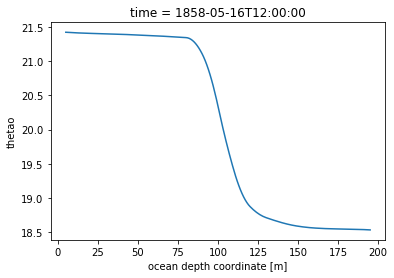

In [63]:
test.interpolate_na(dim = 'level', method='quadratic')[100].plot()

In [67]:
#lets try to reindex the whole dataset and then look at what happens when plien fitting
new_index = np.linspace(T.level.values[0], T.level.values[-1], 191)
T_ri = T.reindex({'level':new_index})
#now interpolate values using quadratic spline
T_ri = T_ri.interpolate_na(dim = 'level', method='quadratic')

/home/z5113258/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [69]:
#lets look at max dt/dz of TRI and plot
dt = T_ri.differentiate('level') / -T_ri.level.diff('level')
TC = dt.where(dt>0, 0).idxmax('level').groupby('time.month').mean('time')

/home/z5113258/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [105]:
T_rn = T_ri.chunk({'time':220,'level':1,'lat':8,'lon':11})

In [106]:
dt = T_rn.differentiate('level') / -T_rn.level.diff('level')
TC = dt.where(dt>0, 0).idxmax('level').groupby('time.month').mean('time')

ValueError: Chunk size must be larger than edge_order + 1. Minimum chunk for axis 1 is 1. Rechunk to proceed.

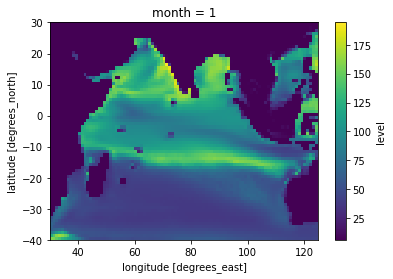

In [110]:
TC[0].plot()

In [98]:
T_rn

,Array,Chunk
Bytes,10.06 GB,14.79 MB
Shape,"(1980, 191, 70, 95)","(220, 191, 8, 11)"
Count,2969 Tasks,729 Chunks
Type,float32,numpy.ndarray


In [10]:
T_N = T.where(T.level > M, np.nan)# this gets only the data where temperature is lower than mixed layer dpeth.

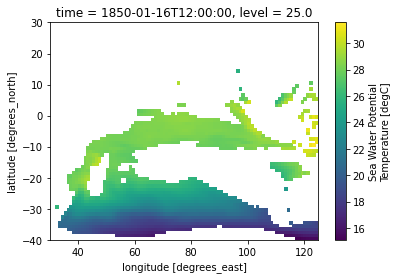

In [26]:
#now begin tot look at 

In [32]:
T_N.level.diff('level')

<xarray.DataArray 'level' (level: 19)>
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10.])
Coordinates:
  * level    (level) float64 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0

In [11]:
#now calcaulte the dt from T_N
dt = T_N.differentiate('level') / -T_N.level.diff('level')

/home/z5113258/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [12]:
test = dt.idxmax('level').groupby('time.month').mean('time')

In [6]:
#now plot climatology
import cartopy.feature as cfeature

def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax
def plot_var_c(vari, vmin, vmax, name, cm):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = cm, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = cm, 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

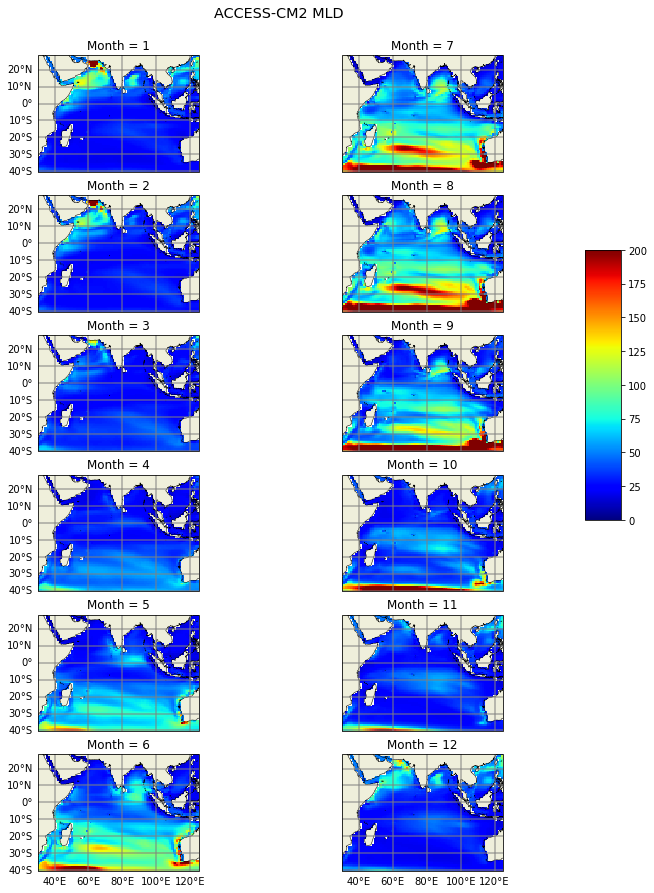

In [9]:
a = plot_var_c(MC, 0, 200, 'ACCESS-CM2 MLD', 'jet')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

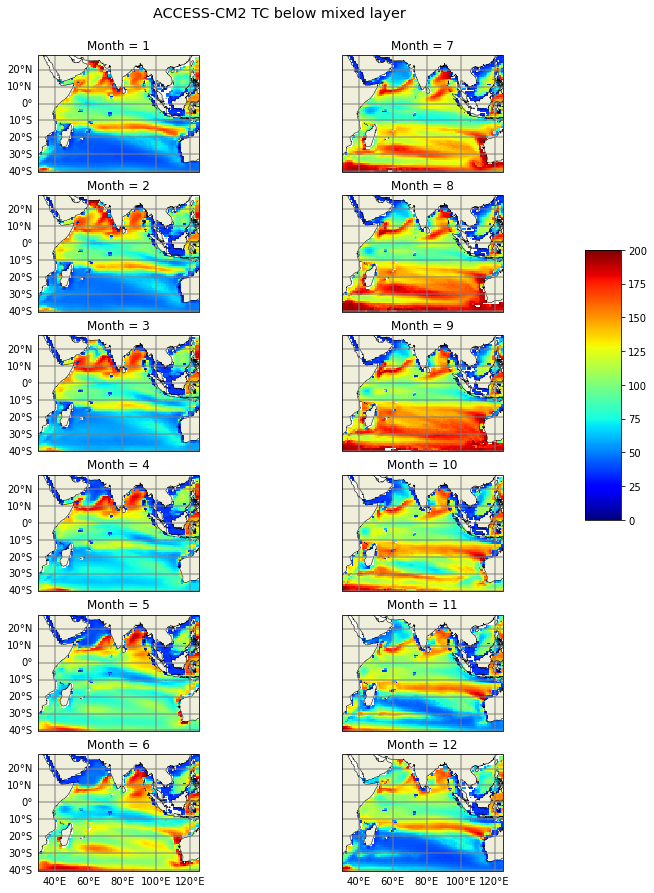

In [20]:
a = plot_var_c(test, 0, 200, 'ACCESS-CM2 TC below mixed layer', 'jet')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

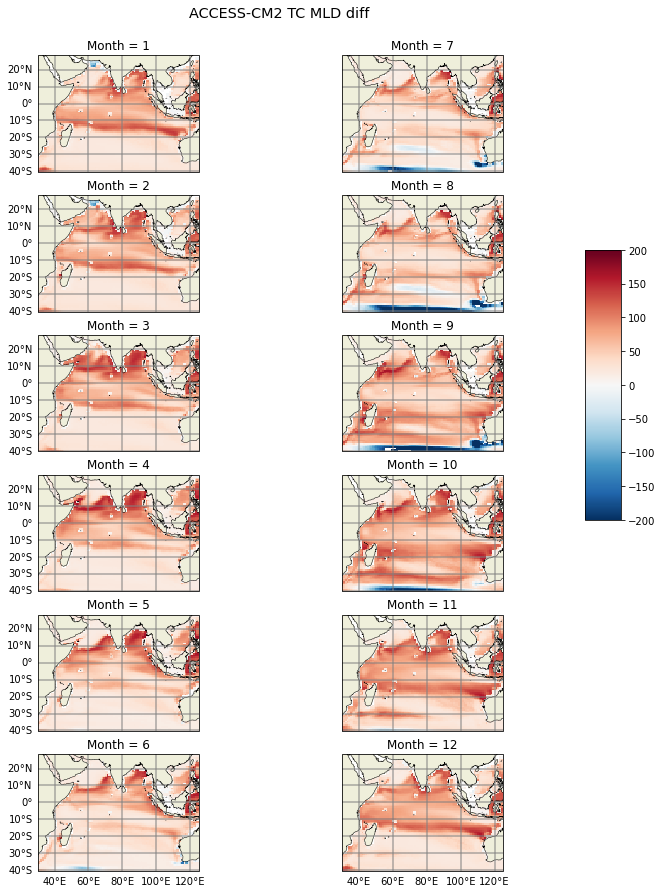

In [14]:
a = plot_var_c((test-MC), -200, 200, 'ACCESS-CM2 TC MLD diff', 'RdBu_r')

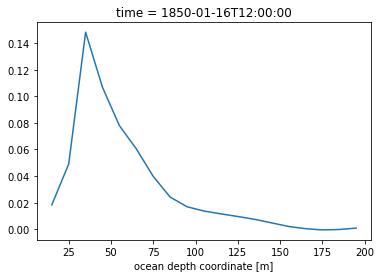

In [10]:
(T.diff('level') / -T_N.level.diff('level')).sel(lat=slice(-30,-27),lon=slice(80,85)).mean(['lat', 'lon'])[0].plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


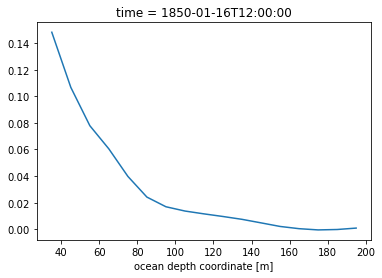

In [11]:
(T_N.diff('level') / -T_N.level.diff('level')).sel(lat=slice(-30,-27),lon=slice(80,85)).mean(['lat', 'lon'])[0].plot()

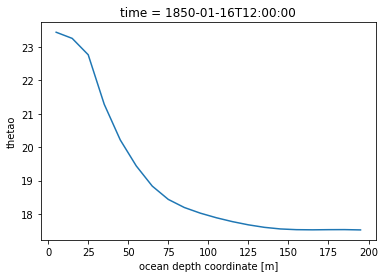

In [12]:
(T).sel(lat=slice(-30,-27),lon=slice(80,85)).mean(['lat', 'lon'])[0].plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


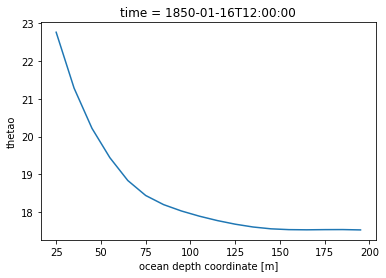

In [13]:
(T_N).sel(lat=slice(-30,-27),lon=slice(80,85)).mean(['lat', 'lon'])[0].plot()

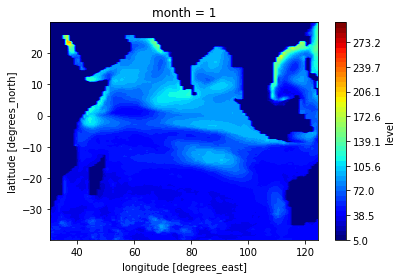

In [33]:
test2[0].plot.contourf(cmap = 'jet', levels = 45, vmax = 300)

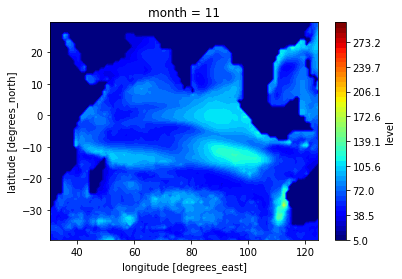

In [34]:

test1[10].plot.contourf(cmap = 'jet', levels = 45, vmax = 300)

In [163]:
T = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/theta_deep/*.nc').thetao.sel(lat=slice(-40,30),lon=slice(30,125))

In [164]:
T

<xarray.DataArray 'thetao' (time: 1980, lev: 20, lat: 70, lon: 95)>
dask.array<getitem, shape=(1980, 20, 70, 95), dtype=float32, chunksize=(120, 20, 70, 95), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 26.5 27.5 28.5 29.5
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    units:          degC
    comment:        Diagnostic should be contributed even for models using co...
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2019-11-08T18:41:01Z altered by CMOR: replaced missing va...

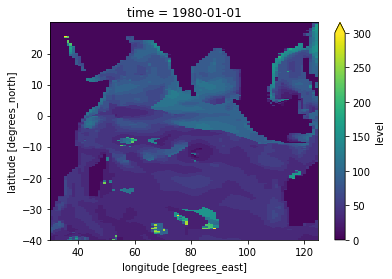

In [149]:
dt[0].where(dt[0]>0, 0).where(dddt[0]<0, 0).where(
    ((ddt[0] >= -0.0001) & (ddt[0]  <= 0.0001)), 0).idxmax('level').plot(vmin = 0, vmax = 300)

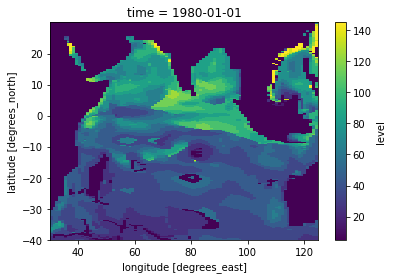

In [135]:
dt[0,:15].where(((ddt[0, :15] >= -0.0001) & (ddt[0, :15]  <= 0.0001)), 0).idxmax('level').plot()

In [119]:
dt

,Array,Chunk
Bytes,1.57 GB,38.30 MB
Shape,"(492, 40, 210, 95)","(12, 40, 210, 95)"
Count,452 Tasks,41 Chunks
Type,float32,numpy.ndarray


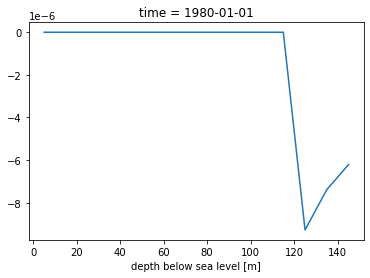

In [127]:
sctr_ddt[0, :15].where(((sctr_ddt[0, :15] >= -0.00001) & (sctr_ddt[0, :15]  <= 0.00001)), 0).plot()

In [150]:
sctr = T.sel(lat=slice(-35,-34),lon=slice(67,68)).mean(['lat','lon'])

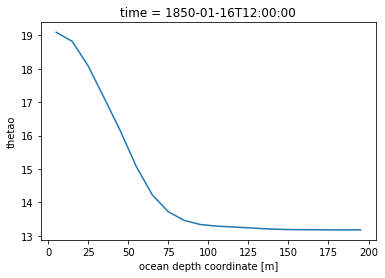

In [151]:
sctr[0].plot()

In [152]:
sctr_dt = dt.sel(lat=slice(-35,-34),lon=slice(67,68)).mean(['lat','lon'])

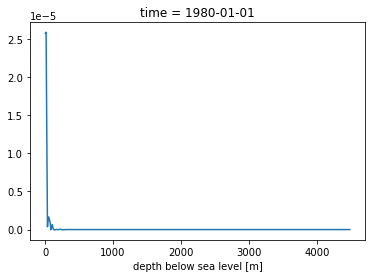

In [158]:
sctr_dt.differentiate('level').differentiate('level')[0].plot()

In [7]:
sctr_ddt = sctr_dt.differentiate('level')

In [8]:
sctr_dddt = sctr_ddt.differentiate('level')

In [114]:
sctr_dt[0, :13].where(sctr_dt[0,:13]>0, 0).where(sctr_dddt[0,:13]<0, 0).max()

<xarray.DataArray ()>
dask.array<nanmax-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1980-01-01

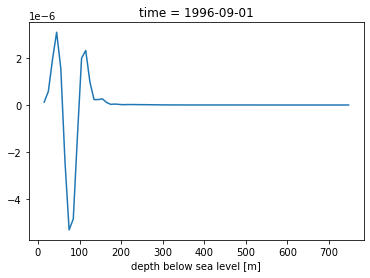

In [109]:
sctr_dddt[200,1:-10].plot()

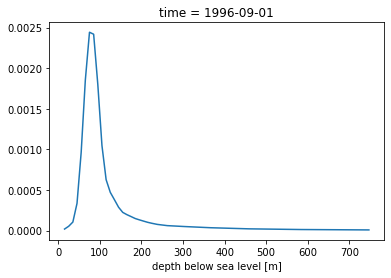

In [10]:
sctr_dt[200,1:-10].plot()

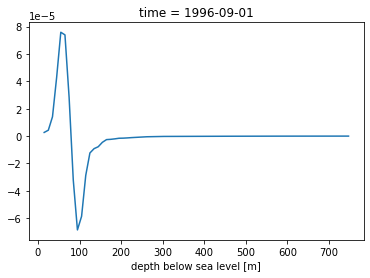

In [31]:
a = sctr_ddt[200,1:-10].plot()

In [42]:
sctr_ddt

<xarray.DataArray (time: 492, level: 40)>
dask.array<_trim, shape=(492, 40), dtype=float32, chunksize=(12, 40), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01

In [97]:
sctr.level

<xarray.DataArray 'level' (level: 40)>
array([   5.,   15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,   95.,
        105.,  115.,  125.,  135.,  145.,  155.,  165.,  175.,  185.,  195.,
        205.,  215.,  225.,  238.,  262.,  303.,  366.,  459.,  584.,  747.,
        949., 1193., 1479., 1807., 2174., 2579., 3016., 3483., 3972., 4478.],
      dtype=float32)
Coordinates:
  * level    (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
Attributes:
    positive:      down
    units:         m
    long_name:     depth below sea level
    actual_range:  [   5. 4478.]
    axis:          Z

In [75]:
from scipy import interpolate
x = sctr_ddt[200,1:10].level
y = sctr_ddt[200,1:10]
f = interpolate.interp1d(x,y)

In [89]:
f(0.000021)

array(54.54953427)

In [81]:
x.values

array([ 2.6598298e-06,  4.3014275e-06,  1.4098519e-05,  4.2894877e-05,
        7.5887605e-05,  7.3953066e-05,  2.8219532e-05, -3.2132572e-05,
       -6.8580535e-05], dtype=float32)

In [73]:
xnew = np.arange(-1e-4, 1e-4, 1e-5)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', ynew, xnew, '-')

ValueError: A value in x_new is below the interpolation range.

In [53]:
sctr_ddt[200,1], sctr_ddt[200,-10]

(<xarray.DataArray ()>
 dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     level    float32 15.0
     time     datetime64[ns] 1996-09-01,
 <xarray.DataArray ()>
 dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     level    float32 949.0
     time     datetime64[ns] 1996-09-01)

In [41]:
a[0].get_xydata()

array([[ 1.50000000e+01,  2.65982976e-06],
       [ 2.50000000e+01,  4.30142745e-06],
       [ 3.50000000e+01,  1.40985194e-05],
       [ 4.50000000e+01,  4.28948770e-05],
       [ 5.50000000e+01,  7.58876049e-05],
       [ 6.50000000e+01,  7.39530660e-05],
       [ 7.50000000e+01,  2.82195324e-05],
       [ 8.50000000e+01, -3.21325715e-05],
       [ 9.50000000e+01, -6.85805353e-05],
       [ 1.05000000e+02, -5.86268106e-05],
       [ 1.15000000e+02, -2.87424282e-05],
       [ 1.25000000e+02, -1.23462487e-05],
       [ 1.35000000e+02, -9.19240210e-06],
       [ 1.45000000e+02, -7.78919093e-06],
       [ 1.55000000e+02, -4.55899226e-06],
       [ 1.65000000e+02, -2.57272313e-06],
       [ 1.75000000e+02, -2.37711401e-06],
       [ 1.85000000e+02, -2.02727233e-06],
       [ 1.95000000e+02, -1.58687180e-06],
       [ 2.05000000e+02, -1.51520135e-06],
       [ 2.15000000e+02, -1.33909089e-06],
       [ 2.25000000e+02, -1.12379553e-06],
       [ 2.38000000e+02, -9.01881151e-07],
       [ 2.

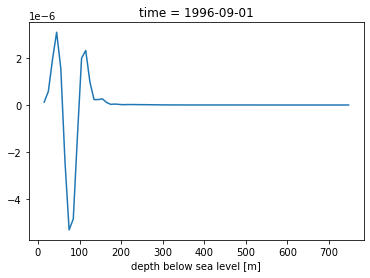

In [12]:
sctr_dddt[200,1:-10].plot()

In [13]:
sctr = T.sel(lat=slice(-10,10),lon=slice(50,70)).mean(['lat','lon'])

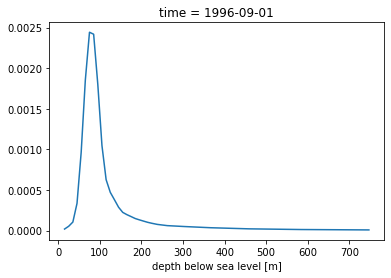

In [14]:
sctr_dt[200,1:-10].plot()

In [15]:
sctr_ddt[200,1:-10].values

array([ 2.6598298e-06,  4.3014275e-06,  1.4098519e-05,  4.2894877e-05,
        7.5887605e-05,  7.3953066e-05,  2.8219532e-05, -3.2132572e-05,
       -6.8580535e-05, -5.8626811e-05, -2.8742428e-05, -1.2346249e-05,
       -9.1924021e-06, -7.7891909e-06, -4.5589923e-06, -2.5727231e-06,
       -2.3771140e-06, -2.0272723e-06, -1.5868718e-06, -1.5152013e-06,
       -1.3390909e-06, -1.1237955e-06, -9.0188115e-07, -4.9978360e-07,
       -2.5579550e-07, -1.9908391e-07, -1.1405718e-07, -5.1018649e-08,
       -2.0894920e-08], dtype=float32)

In [16]:
sctr_dt

<xarray.DataArray (time: 492, level: 40)>
dask.array<mean_agg-aggregate, shape=(492, 40), dtype=float32, chunksize=(12, 40), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01

In [17]:
sctr_ddt

<xarray.DataArray (time: 492, level: 40)>
dask.array<_trim, shape=(492, 40), dtype=float32, chunksize=(12, 40), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01

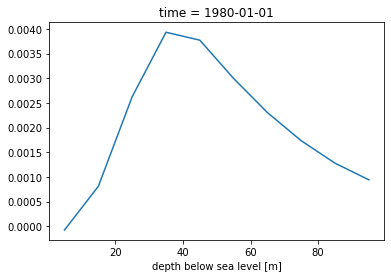

In [18]:
sctr_dt[0, 0:10].plot()

In [19]:
TD = dt[:, 5:].idxmax('level')#.groupby('time.month').mean('time')

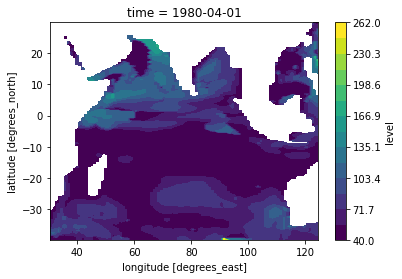

In [20]:
TD[3].plot.contourf(levels = 15, vmin = 40)

In [21]:
#assign polynomial, and then find the maximumn
test = np.polyfit(sctr.level, sctr[0], deg = 3)

In [22]:
test

array([-1.54551685e-09,  1.23703375e-05, -2.98551402e-02,  2.95928086e+02])

In [23]:
c = np.poly1d(test)

In [24]:
xp = np.linspace(0,4000,4000)

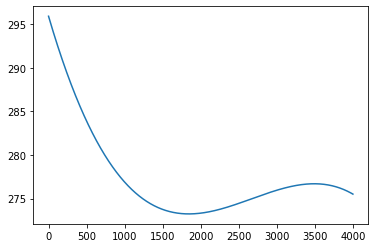

In [25]:
plt.plot(xp, c(xp))

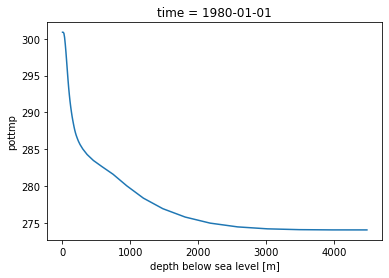

In [26]:
sctr[0].plot()

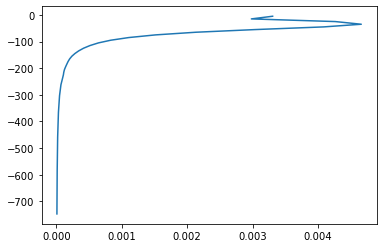

In [27]:
plt.plot(sctr_dt[1,:-10], -sctr_dt.level[:-10])

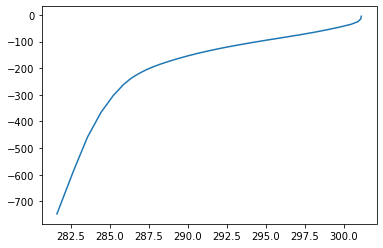

In [28]:
plt.plot(sctr[1,:-10], -sctr.level[:-10])

In [29]:
#load in full THETA DS (down 200m)
T = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/theta_deep/*.nc').thetao.sel(lat=slice(-40,30),lon=slice(30,125))

In [30]:
T

<xarray.DataArray 'thetao' (time: 1980, lev: 20, lat: 70, lon: 95)>
dask.array<getitem, shape=(1980, 20, 70, 95), dtype=float32, chunksize=(120, 20, 70, 95), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 26.5 27.5 28.5 29.5
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    units:          degC
    comment:        Diagnostic should be contributed even for models using co...
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2019-11-08T18:41:01Z altered by CMOR: replaced missing va...